<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# DEPLOYMENT

**Welcome to deployment section! In this section of the course, we will go through the entire deployment process, starting as if you had to create a servicable model from scratch, then deploy it for others to use, either through API or a web form.**

# Data

For this example we use the very common data set: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is about flowers. 

From Wikipedia:
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("../DATA/iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [8]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
scaled_X_train = scaler.transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(patience=10)

In [19]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 [==============================] - 2s 217ms/step - loss: 1.1539 - accuracy: 0.3869 - val_loss: 1.0945 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 28ms/step - loss: 1.1162 - accuracy: 0.4365 - val_loss: 1.0887 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1230 - accuracy: 0.4588 - val_loss: 1.0831 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 1.1054 - accuracy: 0.4592 - val_loss: 1.0773 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1043 - accuracy: 0.4931 - val_loss: 1.0717 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1172 - accuracy: 0.4517 - val_loss: 1.0663 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1060 - accuracy: 0.4906 - val_loss: 1.0609 - val_accuracy: 0.5333
Epoch 8/300
4/4 [==

4/4 [==============================] - 0s 11ms/step - loss: 0.7998 - accuracy: 0.6783 - val_loss: 0.8452 - val_accuracy: 0.6000
Epoch 60/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8035 - accuracy: 0.7015 - val_loss: 0.8420 - val_accuracy: 0.6000
Epoch 61/300
4/4 [==============================] - 0s 12ms/step - loss: 0.8027 - accuracy: 0.6723 - val_loss: 0.8387 - val_accuracy: 0.6000
Epoch 62/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7964 - accuracy: 0.6858 - val_loss: 0.8354 - val_accuracy: 0.6000
Epoch 63/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7900 - accuracy: 0.6796 - val_loss: 0.8323 - val_accuracy: 0.6000
Epoch 64/300
4/4 [==============================] - 0s 30ms/step - loss: 0.7735 - accuracy: 0.7192 - val_loss: 0.8291 - val_accuracy: 0.6000
Epoch 65/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7837 - accuracy: 0.6858 - val_loss: 0.8258 - val_accuracy: 0.6000
Epoch 66/300
4/4 [========

4/4 [==============================] - 0s 11ms/step - loss: 0.6259 - accuracy: 0.6671 - val_loss: 0.6772 - val_accuracy: 0.6000
Epoch 118/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6211 - accuracy: 0.6775 - val_loss: 0.6749 - val_accuracy: 0.6000
Epoch 119/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5930 - accuracy: 0.7202 - val_loss: 0.6726 - val_accuracy: 0.6000
Epoch 120/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5991 - accuracy: 0.6973 - val_loss: 0.6702 - val_accuracy: 0.6000
Epoch 121/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6083 - accuracy: 0.6765 - val_loss: 0.6676 - val_accuracy: 0.6000
Epoch 122/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5903 - accuracy: 0.7067 - val_loss: 0.6653 - val_accuracy: 0.6000
Epoch 123/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5964 - accuracy: 0.6962 - val_loss: 0.6627 - val_accuracy: 0.6000
Epoch 124/300
4/4 [=

Epoch 175/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4972 - accuracy: 0.7292 - val_loss: 0.5539 - val_accuracy: 0.7667
Epoch 176/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4851 - accuracy: 0.7656 - val_loss: 0.5522 - val_accuracy: 0.8000
Epoch 177/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4956 - accuracy: 0.7785 - val_loss: 0.5506 - val_accuracy: 0.8000
Epoch 178/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4910 - accuracy: 0.7723 - val_loss: 0.5486 - val_accuracy: 0.8000
Epoch 179/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5067 - accuracy: 0.7631 - val_loss: 0.5465 - val_accuracy: 0.8000
Epoch 180/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4810 - accuracy: 0.7902 - val_loss: 0.5448 - val_accuracy: 0.8000
Epoch 181/300
4/4 [==============================] - 0s 12ms/step - loss: 0.4731 - accuracy: 0.8029 - val_loss: 0.5431 - val_accuracy: 0.8000
Epoch 

Epoch 233/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4233 - accuracy: 0.9077 - val_loss: 0.4624 - val_accuracy: 0.9333
Epoch 234/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4277 - accuracy: 0.8660 - val_loss: 0.4610 - val_accuracy: 0.9667
Epoch 235/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3926 - accuracy: 0.9233 - val_loss: 0.4600 - val_accuracy: 0.9667
Epoch 236/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4215 - accuracy: 0.8679 - val_loss: 0.4587 - val_accuracy: 0.9667
Epoch 237/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4204 - accuracy: 0.8877 - val_loss: 0.4572 - val_accuracy: 0.9667
Epoch 238/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3992 - accuracy: 0.9002 - val_loss: 0.4562 - val_accuracy: 0.9667
Epoch 239/300
4/4 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.90 - 0s 13ms/step - loss: 0.3993 - accuracy: 0.8960 - val_

4/4 [==============================] - 0s 10ms/step - loss: 0.3756 - accuracy: 0.9617 - val_loss: 0.3929 - val_accuracy: 0.9667
Epoch 291/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3554 - accuracy: 0.9690 - val_loss: 0.3915 - val_accuracy: 0.9667
Epoch 292/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3525 - accuracy: 0.9700 - val_loss: 0.3900 - val_accuracy: 0.9667
Epoch 293/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3711 - accuracy: 0.9502 - val_loss: 0.3888 - val_accuracy: 0.9667
Epoch 294/300
4/4 [==============================] - 0s 15ms/step - loss: 0.3433 - accuracy: 0.9721 - val_loss: 0.3876 - val_accuracy: 0.9667
Epoch 295/300
4/4 [==============================] - 0s 12ms/step - loss: 0.3403 - accuracy: 0.9617 - val_loss: 0.3869 - val_accuracy: 0.9667
Epoch 296/300
4/4 [==============================] - 0s 12ms/step - loss: 0.3370 - accuracy: 0.9742 - val_loss: 0.3858 - val_accuracy: 0.9667
Epoch 297/300
4/4 [=

## Model Evaluation

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.140512,0.391667,1.094477,0.500000
1,1.131292,0.416667,1.088694,0.500000
2,1.123208,0.433333,1.083057,0.500000
3,1.114658,0.450000,1.077301,0.500000
4,1.106691,0.475000,1.071715,0.500000
...,...,...,...,...
295,0.346435,0.966667,0.385848,0.966667
296,0.345387,0.966667,0.384787,0.966667
297,0.344422,0.966667,0.383703,0.966667
298,0.343441,0.966667,0.382703,0.966667


<AxesSubplot:>

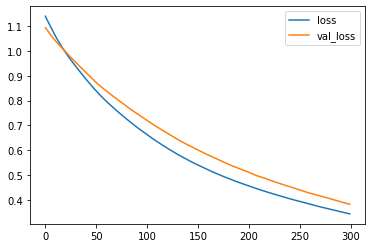

In [22]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

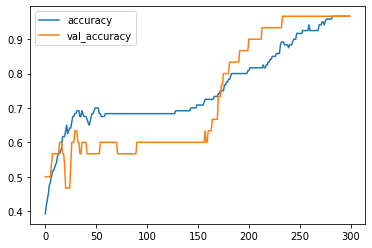

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.3816627264022827, 0.9666666388511658]

## Ready Model for Deployment

In [25]:
epochs = len(metrics)

In [26]:
scaled_X = scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 748us/step - loss: 1.0712 - accuracy: 0.3516
Epoch 2/300
5/5 [==============================] - 0s 997us/step - loss: 1.0824 - accuracy: 0.3242
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0694 - accuracy: 0.3346
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0386 - accuracy: 0.3615
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0438 - accuracy: 0.3160
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0299 - accuracy: 0.3477
Epoch 7/300
5/5 [==============================] - 0s 997us/step - loss: 1.0185 - accuracy: 0.3286
Epoch 8/300
5/5 [==============================] - 0s 756us/step - loss: 1.0080 - accuracy: 0.3682
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0263 - accuracy: 0.4184
Epoch 10/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0089 - accuracy: 0.5187
Epoch 11/300
5/5 [===

5/5 [==============================] - 0s 760us/step - loss: 0.7028 - accuracy: 0.7025
Epoch 84/300
5/5 [==============================] - 0s 998us/step - loss: 0.6875 - accuracy: 0.7285
Epoch 85/300
5/5 [==============================] - 0s 746us/step - loss: 0.6805 - accuracy: 0.7207
Epoch 86/300
5/5 [==============================] - 0s 997us/step - loss: 0.6710 - accuracy: 0.6938
Epoch 87/300
5/5 [==============================] - 0s 748us/step - loss: 0.6843 - accuracy: 0.6912
Epoch 88/300
5/5 [==============================] - 0s 997us/step - loss: 0.6764 - accuracy: 0.7138
Epoch 89/300
5/5 [==============================] - 0s 997us/step - loss: 0.6681 - accuracy: 0.7212
Epoch 90/300
5/5 [==============================] - 0s 997us/step - loss: 0.6799 - accuracy: 0.7164
Epoch 91/300
5/5 [==============================] - 0s 630us/step - loss: 0.6658 - accuracy: 0.7212
Epoch 92/300
5/5 [==============================] - 0s 740us/step - loss: 0.6647 - accuracy: 0.7056
Epoch 93/300


5/5 [==============================] - 0s 997us/step - loss: 0.4969 - accuracy: 0.8008
Epoch 165/300
5/5 [==============================] - 0s 988us/step - loss: 0.5131 - accuracy: 0.7666
Epoch 166/300
5/5 [==============================] - 0s 748us/step - loss: 0.5061 - accuracy: 0.7744
Epoch 167/300
5/5 [==============================] - 0s 998us/step - loss: 0.4862 - accuracy: 0.7787
Epoch 168/300
5/5 [==============================] - 0s 998us/step - loss: 0.4726 - accuracy: 0.8139
Epoch 169/300
5/5 [==============================] - 0s 746us/step - loss: 0.4820 - accuracy: 0.7992
Epoch 170/300
5/5 [==============================] - 0s 742us/step - loss: 0.4492 - accuracy: 0.8435
Epoch 171/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8105
Epoch 172/300
5/5 [==============================] - 0s 780us/step - loss: 0.5196 - accuracy: 0.7736
Epoch 173/300
5/5 [==============================] - 0s 748us/step - loss: 0.4739 - accuracy: 0.7863
Epoch 

5/5 [==============================] - 0s 499us/step - loss: 0.3832 - accuracy: 0.9419
Epoch 246/300
5/5 [==============================] - 0s 748us/step - loss: 0.3810 - accuracy: 0.9319
Epoch 247/300
5/5 [==============================] - 0s 997us/step - loss: 0.3815 - accuracy: 0.9623
Epoch 248/300
5/5 [==============================] - 0s 997us/step - loss: 0.3572 - accuracy: 0.9419
Epoch 249/300
5/5 [==============================] - 0s 997us/step - loss: 0.3667 - accuracy: 0.9193
Epoch 250/300
5/5 [==============================] - 0s 863us/step - loss: 0.3936 - accuracy: 0.9492
Epoch 251/300
5/5 [==============================] - 0s 997us/step - loss: 0.3687 - accuracy: 0.9466
Epoch 252/300
5/5 [==============================] - 0s 997us/step - loss: 0.3723 - accuracy: 0.9384
Epoch 253/300
5/5 [==============================] - 0s 748us/step - loss: 0.3756 - accuracy: 0.9449
Epoch 254/300
5/5 [==============================] - 0s 996us/step - loss: 0.3515 - accuracy: 0.9601
Epoc

In [29]:
model.save("final_iris_model.h5")

### Saving Scaler

In [30]:
import joblib

In [31]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [32]:
from tensorflow.keras.models import load_model

In [33]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [34]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [35]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [36]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [37]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]
                    

In [39]:
return_prediction(flower_model,flower_scaler,flower_example)

e:\deeplearning\env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'setosa'

# CODE FOR DEPLOYMENT:

In [40]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]

In [41]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}

In [42]:
import requests

In [45]:
results = requests.post("http://127.0.0.1:5000/api/flower",json=flower_example)

In [46]:
results.status_code

200

In [50]:
print(results.text)

"setosa"

